# Aplicaciones de Python

En la presente libreta veremos el uso de la librería `pandas` para el manejo de archivos `.csv` (delimitado por comas).

## Manejo de archivos `csv`

### 1. Modificando ruta de trabajo

In [1]:
# Cambio de ruta a carpeta con csv's
import os 
print('Ruta previa:\n',os.getcwd()) # Antes
os.chdir('E:\Desktop\carpeta de estaciones\estaciones_prueba\estaciones\csvs') # cambio a carpeta con csv's en local
print('Ruta nueva:\n',os.getcwd()) # Después

Ruta previa:
 C:\Users\LENOVO\Documents\00_archivos_python
Ruta nueva:
 E:\Desktop\carpeta de estaciones\estaciones_prueba\estaciones\csvs


In [2]:
# Listar archivos en carpeta
os.listdir()

['ALTAMIZA.csv',
 'BARRIOS.csv',
 'BERNAL.csv',
 'CANCHAQUE.csv',
 'CHALACO.csv',
 'CHIGNIA.csv',
 'CHULUCANAS.csv',
 'CHUSIS.csv',
 'CORRAL DEL MEDIO.csv',
 'CRUCETA.csv',
 'CURVAN.csv',
 'EL TABLAZO.csv',
 'HACIENDA BIGOTE.csv',
 'HUALTACO.csv',
 'HUANCABAMBA.csv',
 'HUARMACA.csv',
 'LAGUNA RAMON.csv',
 'MALACASI.csv',
 'MALINGAS.csv',
 'MIRAFLORES.csv',
 'MONTEGRANDE.csv',
 'MORROPON.csv',
 'PALO BLANCO.csv',
 'PALTASHACO.csv',
 'PASAPAMPA.csv',
 'PIRGAS.csv',
 'SAN ISIDRO.csv',
 'SAN JOAQUIN.csv',
 'SAN MIGUEL.csv',
 'SAN PEDRO.csv',
 'SANTO DOMINGO.csv',
 'TAMBO GRANDE.csv',
 'TEJEDORES.csv',
 'VIRREY.csv']

### Leer archivos csv

Los siguientes archivos `.csv` pertenecen a información descargada del portal ANA sobre estaciones climatológicas de la cuenca Piura.

#### Caso 1: Las fechas presentan buen formato

In [3]:
# Importando archivo csv
import pandas as pd 
estac_1 = pd.read_csv('ALTAMIZA.csv')
estac_1.head()

,ESTACION,OPERADOR,VARIABLE,FECHA,VALOR,UNIDADMEDIDA
0,ALTAMIZA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1972-12-01,0.0,m
1,ALTAMIZA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1972-12-02,0.0,mm
2,ALTAMIZA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1972-12-03,0.0,mm
3,ALTAMIZA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1972-12-04,0.0,mm
4,ALTAMIZA,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1972-12-05,4.1,mm


In [4]:
type(estac_1) # Tipo DataFrame

pandas.core.frame.DataFrame

In [5]:
# Estadística rápida del dataframe
estac_1.describe()

,VALOR
count,6934.000000
mean,2.299769
std,5.341081
min,0.000000
25%,0.000000
50%,0.000000
75%,2.100000
max,71.500000


In [6]:
# Información del dataframe
estac_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6934 entries, 0 to 6933
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ESTACION      6934 non-null   object 
 1   OPERADOR      6934 non-null   object 
 2   VARIABLE      6934 non-null   object 
 3   FECHA         6934 non-null   object 
 4   VALOR         6934 non-null   float64
 5   UNIDADMEDIDA  6934 non-null   object 
dtypes: float64(1), object(5)
memory usage: 325.2+ KB


Nótese la columna FECHA que presenta y tipo de datos `object`:es un `string` y esto dificultará su visualización en gráficas. (Ojo: depende de cada archivo csv que tengas)

In [7]:
# Convirtiendo la columna FECHA a un formato más adecuado
estac_1.FECHA = pd.to_datetime(estac_1.FECHA)
estac_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6934 entries, 0 to 6933
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ESTACION      6934 non-null   object        
 1   OPERADOR      6934 non-null   object        
 2   VARIABLE      6934 non-null   object        
 3   FECHA         6934 non-null   datetime64[ns]
 4   VALOR         6934 non-null   float64       
 5   UNIDADMEDIDA  6934 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 325.2+ KB


De `object` ha cambiado a `datetime64[ns, UTC]`.

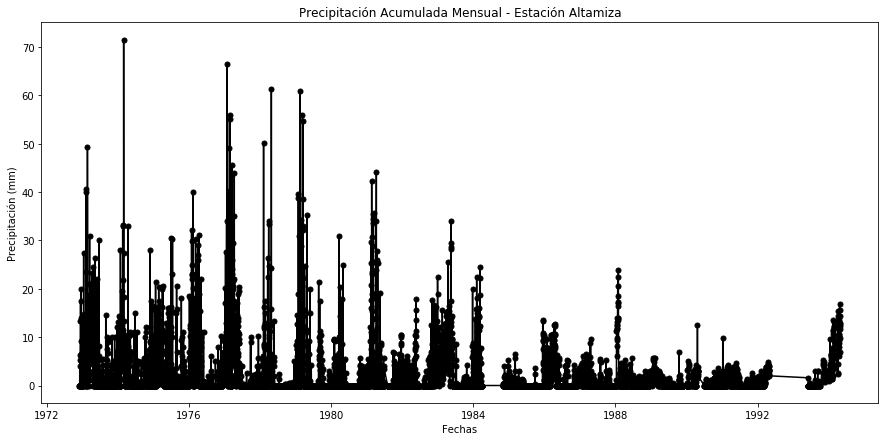

In [8]:
# Visualización: 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(15,7))

plt.plot(estac_1.FECHA, estac_1.VALOR, c='black', marker='o', ms=5)
plt.title('Precipitación Acumulada Mensual - Estación Altamiza')
plt.xlabel('Fechas'), plt.ylabel('Precipitación (mm)'); 

#### Caso 2: Las fechas presentan un formato que requiere procesar

In [9]:
# Importando archivo csv
import pandas as pd 
estac_2 = pd.read_csv('BARRIOS.csv')
estac_2.head()

,ESTACION,OPERADOR,VARIABLE,FECHA,VALOR,UNIDADMEDIDA
0,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-03T00:00:00Z,0.0,mm
1,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-04T00:00:00Z,0.0,mm
2,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-05T00:00:00Z,0.0,mm
3,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-06T00:00:00Z,0.0,mm
4,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-07T00:00:00Z,0.0,mm


Toca corregir el formato de fecha

In [10]:
# 1. Convertir a tipo fecha
estac_2.FECHA = pd.to_datetime(estac_2.FECHA) # devuelve a datetime64[ns] (tipo fecha)

# 2. Modificar el formato (convierte a string)
import datetime as dt
estac_2.FECHA = estac_2.FECHA.dt.strftime('%Y/%m/%d') # convierte a string según formato

# 3. Convertir otra vez a tipo fecha
estac_2.FECHA = pd.to_datetime(estac_2.FECHA)
estac_2.head()

,ESTACION,OPERADOR,VARIABLE,FECHA,VALOR,UNIDADMEDIDA
0,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-03,0.0,mm
1,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-04,0.0,mm
2,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-05,0.0,mm
3,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-06,0.0,mm
4,BARRIOS,SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA,PRECIPITACION ACU 12HOR,1973-09-07,0.0,mm


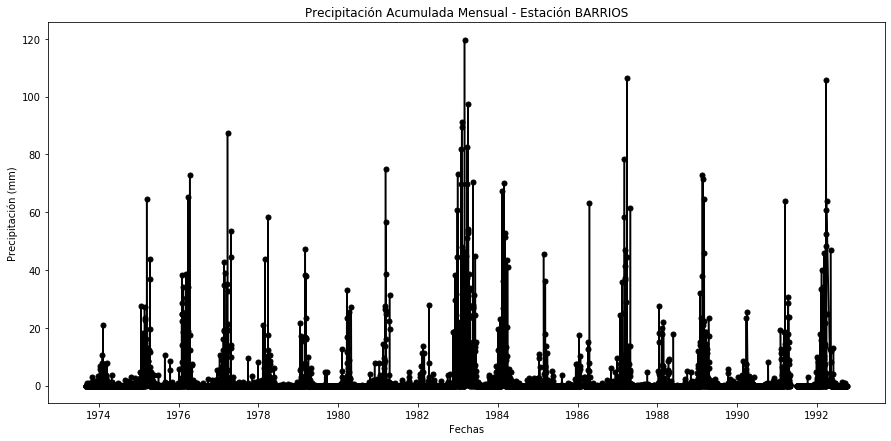

In [11]:
# Visualización
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(15,7))

plt.plot(estac_2.FECHA, estac_2.VALOR, c='black', marker='o', ms=5)
plt.title('Precipitación Acumulada Mensual - Estación BARRIOS')
plt.xlabel('Fechas'), plt.ylabel('Precipitación (mm)'); 

### Conclusiones

1. Cuando se cambia el formato de fechas de tipo `object` (string) a uno de tipo fecha (date), se agiliza el proceso de visualización (y mejora su interpretación). **De no hacerlo, demorará completar el proceso de visualización con matplotlib y se verán indistinguibles las fechas en el eje X.**

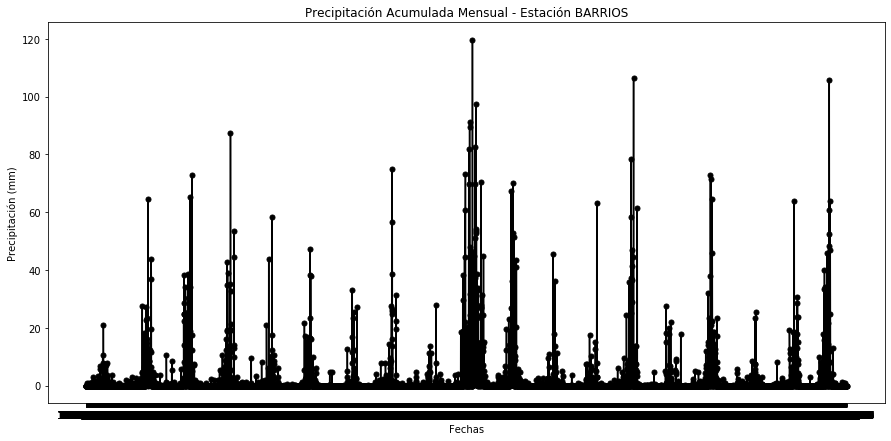

In [12]:
# 1. Importando archivo csv
import pandas as pd 
estac_2 = pd.read_csv('BARRIOS.csv')

# 2. Convertir a tipo fecha
estac_2.FECHA = pd.to_datetime(estac_2.FECHA) # devuelve a datetime64[ns] (tipo fecha)

# 3. Modificar el formato (convierte a string)
import datetime as dt
estac_2.FECHA = estac_2.FECHA.dt.strftime('%Y/%m/%d') # convierte a string según formato

# 4. Visualización (FECHA en tipo object `string`)
plt.figure(1,figsize=(15,7))

plt.plot(estac_2.FECHA, estac_2.VALOR, c='black', marker='o', ms=5)
plt.title('Precipitación Acumulada Mensual - Estación BARRIOS')
plt.xlabel('Fechas'), plt.ylabel('Precipitación (mm)'); 